# Computer Vision - Transformadas geométricas (solución)

En este ejercicio aprenderemos a trabjar con imágenes utilizando la [librería OpenCV](http://opencv.org/). El mismo está divido en las siguientes partes:
1. Pantalla verde
2. **Transformaciones geométricas**
3. Filtros
4. Bordes
5. Hough
6. Detección de esquinas

## Resumen
En esta parte del ejercicio aplicaremos una transformada geométrica sobre una imagen para rotar un objeto dentro de la misma para nuestra conveniencia.

Seguiremos los siguientes pasos:
1. Cargar imagen
2. Identificar esquinas
3. Transformada geométrica

## 1 - Cargar imagen

Importamos las librerías necesarias y cargamos la imagen con la que trabajaremos. La imagen consiste de una tarjeta personal que queremos rotar para poder leer mejor.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

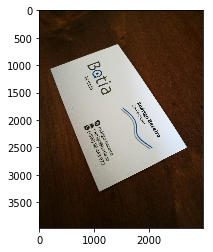

In [2]:
image = cv2.imread("photos/business_card.jpg")
#Copio imagen para no destruirla
image = np.copy(image)
#La leo en RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

## 2 - Identificar esquinas

Utilizaremos la [función plot de matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) para graficar las esquinas de la imagen. Existen funciones para encontrar estas esquinas automáticamente pero eso lo veremos más adelante. Por el momento se sugiere abrir la imagen con una herramienta para visualizar y encontrar las esquinas ahí. Una vez se cuente con todas las esquinas graficarlas sobre la imagen.

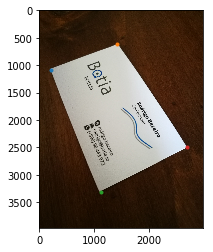

In [3]:
### SOLUCIÓN
plt.imshow(image)
plt.plot(214,1079,".")
plt.plot(1410,620,".")
plt.plot(1120,3315,".")
plt.plot(2690,2500,".")

## 3 - Transformada geométrica
Completar la siguiente función para rotar la imagen. En ella usamos dos funciones de OpenCV que nos permiten aplicar una transformada geométrica a partir de indicarle un array de puntos que queremos transformar. Las mismas se llaman [getPerspectiveTransform](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=getperspectivetransform#cv2.getPerspectiveTransform) y [warpPerspective](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=warpperspective#cv2.warpPerspective). Se sugiere leer sobre ellas en la documentación de OpenCV.

Completar las coordenadas e iterar hasta obtener una imagen satisfactoria.

In [4]:
### SOLUCIÓN
#Origen
source_pts = np.float32([
        [1410,620], #Arriba izquierda
        [214,1079], #Abajo izquierda
        [1120,3315], #Abajo derecha
        [2690,2500] #Arriba derecha
    ])
#Elijo un destino
warped_pts = np.float32([
        [200,200],#Arriba izquierda
        [200,2500], #Abajo izquierda
        [4600,2500], #Abajo derecha
        [4600,200]#Arriba derecha
    ])

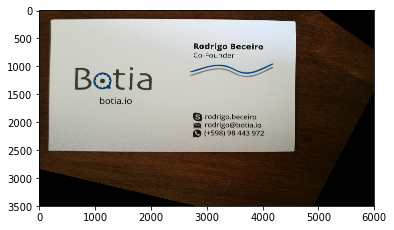

In [6]:
def warp(image,source_pts,warped_pts):
    #Obtener la perspectiva
    M = cv2.getPerspectiveTransform(source_pts,warped_pts)
    #Para retornar al original
    #M_inv = cv2.getPerspectiveTransform(warped_pts,source_pts)
    
    image_size = (image.shape[1],image.shape[0])
    warped = cv2.warpPerspective(image,M,(6000,3500),flags=cv2.INTER_LINEAR)
    return warped

warped_image = warp(image,source_pts,warped_pts)
plt.imshow(warped_image)